In [21]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_wine


# 엑셀 파일 불러오기

df = pd.read_excel("C:/Users/hanyo/Downloads/wine.xlsx", engine="openpyxl")
df

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065  
1                    0.26     1.28       4.38  1.05  3.40     1050  
2                    0.30     2.81       5.68  1.03  3.17     1185  
3                    0.24     2.18       7.80  0.86  3.45     1480  
4                    0.39     1.82       4.32  1.04  2.93      735  
..                    ...      ...        ...   ...   ...      ...  
173                  0.52     1.06       7.70  0.64  1.74      740  
174                  0.43     1.41       7.30  0.70  1.56      750  
175                  0.43     1.35      10.20  0.59  1.56      835  
176                  0.53     1.46       9.30  0.60  1.62      840  
177                  0.56     1.35       9.20  0.61  1.60      560  

[178 rows x 14 columns]

In [22]:
# 컬렴명 확인
df.columns


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

Text(0.5, 1.0, 'Wine')

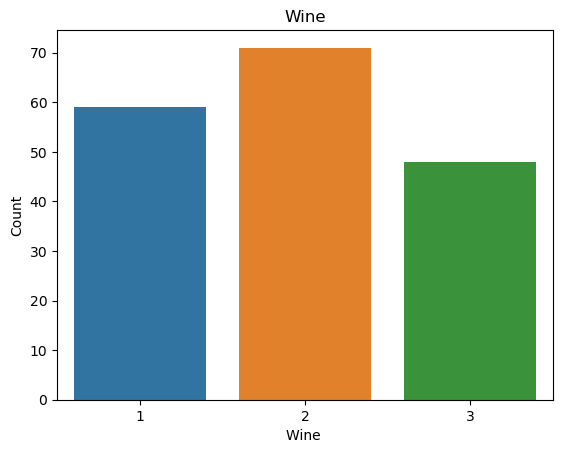

In [23]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Wine")
plt.xlabel("Wine ")
plt.ylabel("Count")
plt.title("Wine")

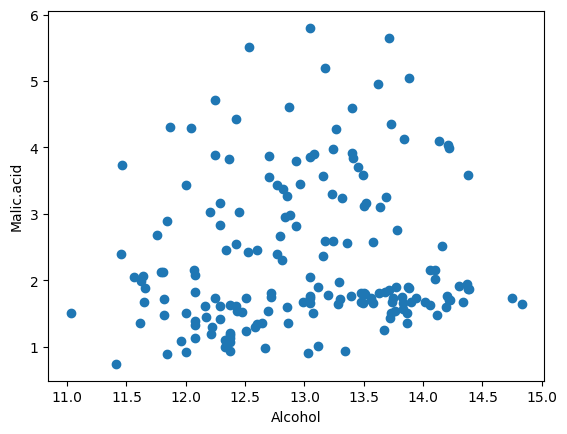

In [24]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Alcohol'], df['Malic.acid'])
plt.xlabel('Alcohol')
plt.ylabel('Malic.acid')

plt.show()

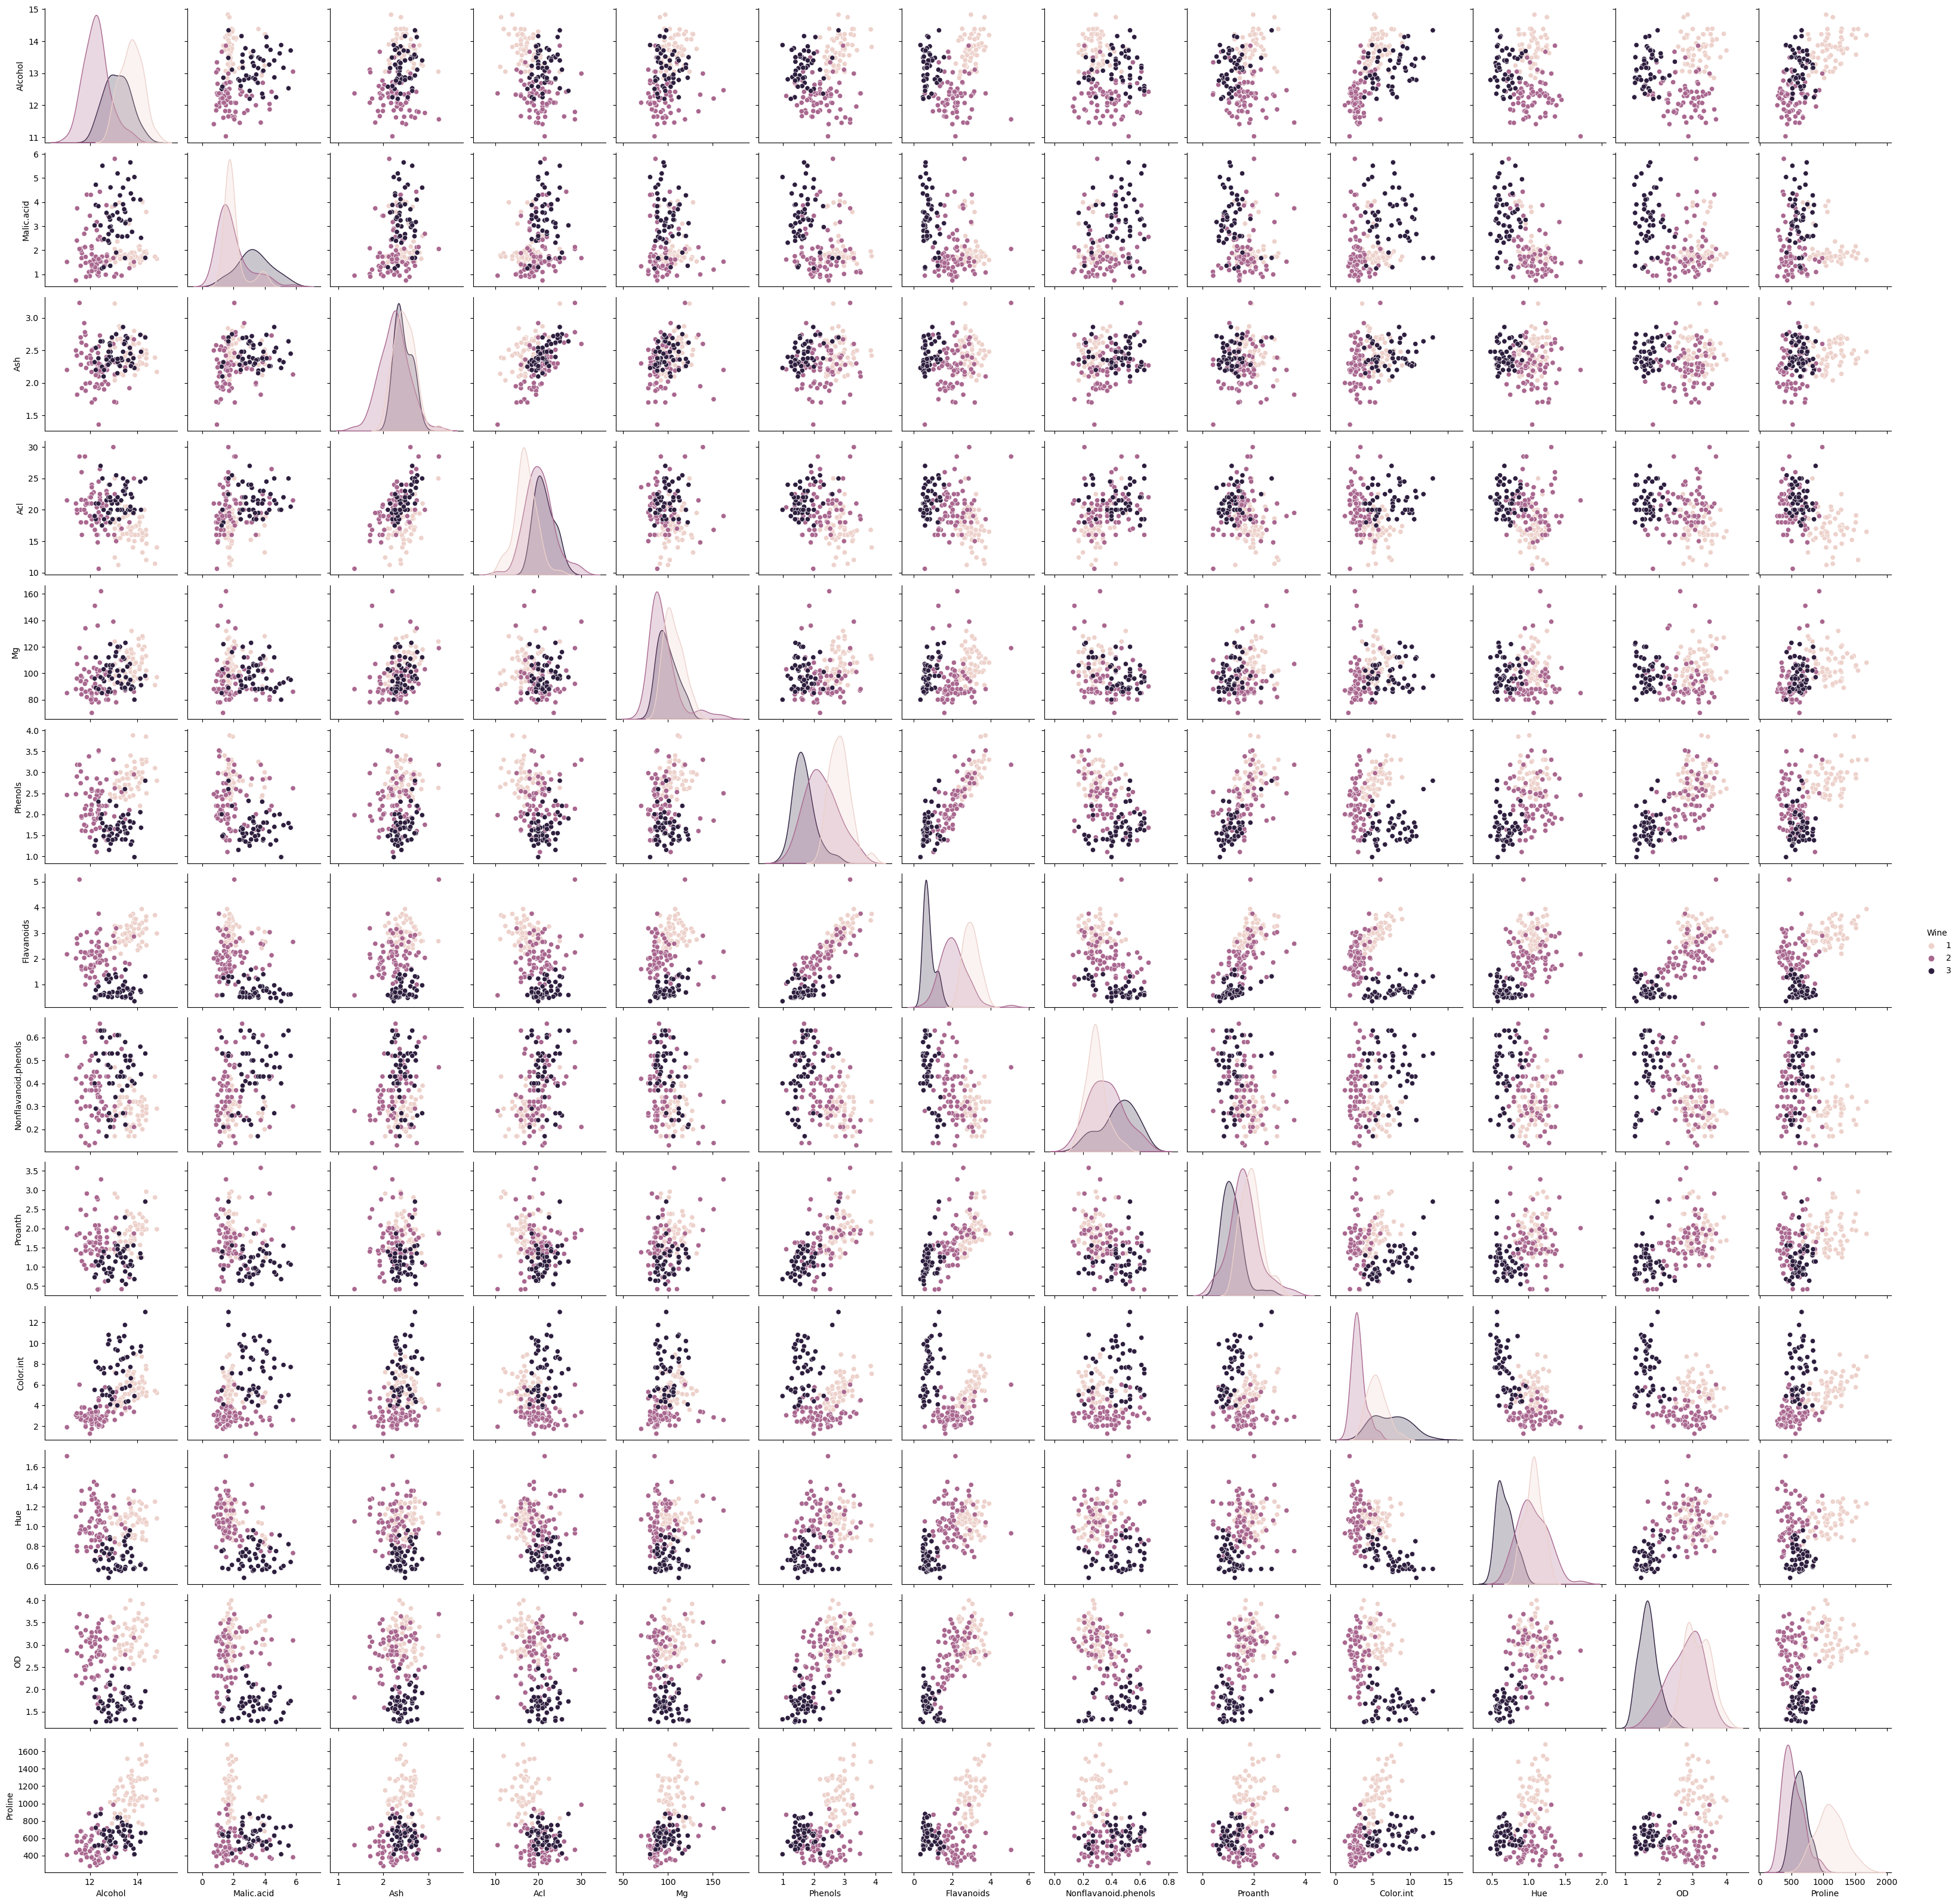

In [38]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
            hue ='Wine')
plt.show()

In [39]:
X=df.drop('Wine',axis=1)
X.head()
y=df['Wine']
y.value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [41]:
Y = pd.get_dummies(y).values

In [42]:
X = X.values

In [43]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [44]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [46]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(13,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\hanyo\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.4075 - loss: 20.9501 - val_accuracy: 0.5556 - val_loss: 0.7834
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4479 - loss: 1.8805 - val_accuracy: 0.4444 - val_loss: 1.2288
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3952 - loss: 1.2216 - val_accuracy: 0.4444 - val_loss: 0.6722
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3295 - loss: 0.6675 - val_accuracy: 0.5000 - val_loss: 0.5789
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5074 - loss: 0.6202 - val_accuracy: 0.4444 - val_loss: 0.5412
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4963 - loss: 0.5359 - val_accuracy: 0.4722 - val_loss: 0.5375
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5137 - loss: 0.5393 - val_accuracy: 0.5000 - val_loss: 0.4912
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5181 - loss: 0.5278 - val_accuracy: 0.5000 - val_loss: 0.463

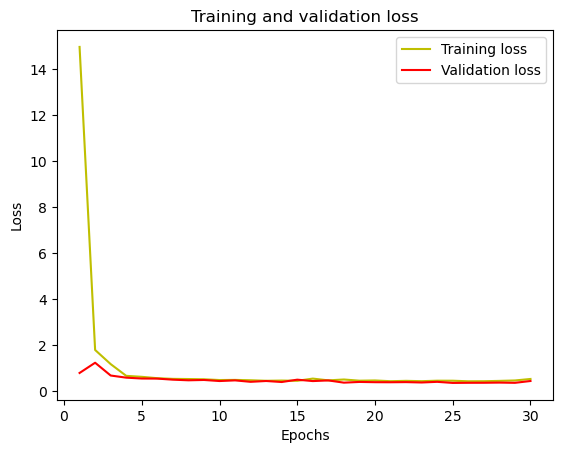

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

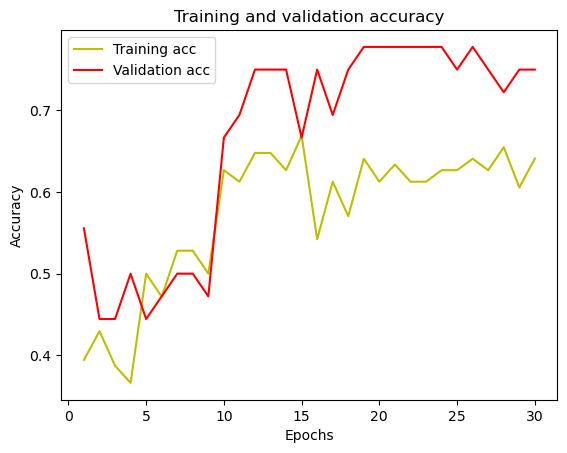

In [49]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.73      1.00      0.84        16
           2       0.25      0.17      0.20         6

    accuracy                           0.75        36
   macro avg       0.66      0.63      0.63        36
weighted avg       0.75      0.75      0.73        36

[[10  1  3]
 [ 0 16  0]
 [ 0  5  1]]


In [53]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 하이퍼파라미터 그리드 설정
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [55]:
# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier(random_state=42)

# 랜덤 서치 적용
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42
)

# 모델 학습
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=2)

In [56]:
# 최적 하이퍼파라미터 출력
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


In [57]:
# 최적 모델로 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


In [58]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [59]:
# 교차검증 ...
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross Validation Scores: [0.96551724 0.96551724 1.         1.         1.        ]
Mean CV Accuracy: 0.9862068965517242


In [61]:
# 테스트 데이터에서 정확도
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 1.0000


In [62]:
print(f"Dataset size: {df.shape[0]} samples")
# 데이터가 100개 이하면 높은 CV 점수는 신뢰를 잃음

Dataset size: 178 samples
